################ ################ ################           ################ ################ ################ 
################ ################ ################           ################ ################ ################ 


Walkthrough code from dataset normmzioation step all the way to compouting accuracy scores using three approaches: MSE, DOT_DOT_NORM 



################ ################ ################           ################ ################ ################ 
################ ################ ################           ################ ################ ################ 



In [ ]:
############################## Mixed Dataset Normalization (Meand and STD computation) ################################

In [42]:
# Train dataset normalization 

import shutil, random, os
import cv2
import numpy as np


types=['EECE571L-MaskedFaceDetection-CNN/Data/Feature_extractor/Mixed_dataset/train']
for type in types: 
    directory_path = './'+type 
    folders= os.listdir(directory_path) # list of all the folder names
    
    count=0
    b_mean=[]
    b_std= []
    g_mean=[]
    g_std= []
    r_mean=[]
    r_std= []
    for folder in folders: # looping through all the gender folders
        if folder not in  ".DS_Store":
                count+=1
                folder_path= directory_path +"/"+ folder
                files= os.listdir(folder_path) # names of the files inside the folder
                
            
                for file in files:
                    if file not in  ".DS_Store":
                        img = cv2.imread(folder_path+"/"+ file)
                        b = img[:,:,0]/255
                        g = img[:,:,1]/255
                        r = img[:,:,2]/255

                        b_mean.append(b.mean())
                        b_std.append(b.std())
                        g_mean.append(g.mean())
                        g_std.append(g.std())
                        r_mean.append(r.mean())
                        r_std.append(r.std())

    B_mean= np.mean (b_mean)
    B_std= np.mean (b_std)
    G_mean=np.mean(g_mean) 
    G_std=np.mean (g_std) 
    R_mean=np.mean(r_mean) 
    R_std=np.mean (r_std) 
    print (" Normalziation for train dataset:")
    print (R_mean,G_mean, B_mean,R_std,G_std, B_std)            
                            
                
                
                
            
  

 Normalziation for train dataset:
0.4706155413031573 0.4155981526458318 0.3794127018972444 0.2681391062637582 0.24723137207986798 0.24271453938450466


NOTE:

- mean train dataset:
        [0.4706155413031573, 0.4155981526458318, 0.3794127018972444]

- STD train dataset:
        [0.2681391062637582 ,0.24723137207986798, 0.24271453938450466]

In [43]:
# Validation dataset normalization 

import shutil, random, os
import cv2
import numpy as np


types=['EECE571L-MaskedFaceDetection-CNN/Data/Feature_extractor/Mixed_dataset/val']
for type in types: 
    directory_path = './'+type 
    folders= os.listdir(directory_path) # list of all the folder names
    
    count=0
    b_mean=[]
    b_std= []
    g_mean=[]
    g_std= []
    r_mean=[]
    r_std= []
    for folder in folders: # looping through all the gender folders
        if folder not in  ".DS_Store":
                count+=1
                folder_path= directory_path +"/"+ folder
                files= os.listdir(folder_path) # names of the files inside the folder
                
               
                for file in files:
                    if file not in  ".DS_Store":
                        img = cv2.imread(folder_path+"/"+ file)
                        b = img[:,:,0]/255
                        g = img[:,:,1]/255
                        r = img[:,:,2]/255

                        b_mean.append(b.mean())
                        b_std.append(b.std())
                        g_mean.append(g.mean())
                        g_std.append(g.std())
                        r_mean.append(r.mean())
                        r_std.append(r.std())

    B_mean= np.mean (b_mean)
    B_std= np.mean (b_std)
    G_mean=np.mean(g_mean) 
    G_std=np.mean (g_std) 
    R_mean=np.mean(r_mean) 
    R_std=np.mean (r_std) 
    print (" Normalziation for validation dataset:")
    print (R_mean,G_mean, B_mean,R_std,G_std, B_std)             
                            
                
                
                




 Normalziation for validation dataset:
0.46033145548530674 0.4085566565937252 0.3737638329072535 0.26921737209173047 0.25139288966241435 0.2461153929592356


NOTE:
    
- mean validation dataset:
        [0.46033145548530674, 0.4085566565937252, 0.3737638329072535]
- STD validation dataset: 
        [0.26921737209173047, 0.25139288966241435, 0.2461153929592356]

In [48]:
############ Retraining the VGG-19 model on Compute Canada using the new mean and std values ###########


-The VGG-19 model was retrained by keeping all the provided default parameter values, except for the epochs.

-We only tried two epcohs values when computing the best validaiton accuracy score :


    150 epochs ----> Training complete in 105m 40s ---->  Best val Acc: 0.772177 (77.21%)


    250 epochs ----> Training complete in 178m 46s ---->  Best val Acc: 0.899194  (89.91 %)




-For more detail, please refer to the training code at this path: /EECE571L-MaskedFaceDetection-CNN/Code/Feature_extractor/training_code/train_face.py



In [ ]:
############################ Finding MSE/ Dot product/ normalized dot thresholds (VGG-19 used Without FC3 layer) ###########################

Our steps:

- We used mean and STD values of the training dataset.

- For this case, We decided not to use the FC3 layer of the VGG-19 feature extractor model for finding the threshold values.

- We ran the "Threshold_mse_dot_ndot_Full_dataset_Without_FC3.py" file using "Threshold_mse_dot_ndot_Full_dataset_Without_FC3.sh" bash file to generate an Excel file containing the threshold values for each of the 38 ideintities.


- We took the average threshold value for each one of the three approaches manually using Excel AVG function. We ended up with three threshold values.

        - MSE_treshold =0.216870382   # without classifier (full dataset)
        - DOT_threshold = 1029.688143   # without classifier (full dataset)
        - DOT_NORM_threshold = 0.68939216   # without classifier (full dataset)


- We used the new average threhold values in the "Accuracy_mse_dot_ndot_Full_dataset_Without_FC3.py" file  to compute the accuracy scores using each one of the three approaches.


- For more detail, please refer to the threshold code at this path:/EECE571L-MaskedFaceDetection-CNN/Code/Similarity_analysis/Threshold/Threshold_mse_dot_ndot_Full_dataset_Without_FC3.py

In [ ]:
############################ Finding MSE/ Dot product/ normalized dot accuracy scores ###########################

Our steps:

- We used mean and STD values of of the training dataset.



- For this case, We decided not to use the FC3 layer of the VGG-19 feature extractor model for finding the threshold values.
    
    
    
- We used the new threshold values we got them from the previous step.
        - MSE_treshold =0.216870382   # without classifier (full dataset)
        - DOT_threshold = 1029.688143   # without classifier (full dataset)
        - DOT_NORM_threshold = 0.68939216   # without classifier (full dataset)


- We ran the "Accuracy_mse_dot_ndot_Full_dataset_Without_FC3.py" file using the "Accuracy_mse_dot_ndot_Full_dataset_Without_FC3.sh" bash file to compute the accuracy scores for each one of the three approaches. We ended up with the following accuracy scores:
        - MSE = 97.74 %
        - DOT= 13.5%
        - DOT_NORM=96.99%


In [ ]:
# Check report accuracy word document for a summary of the results






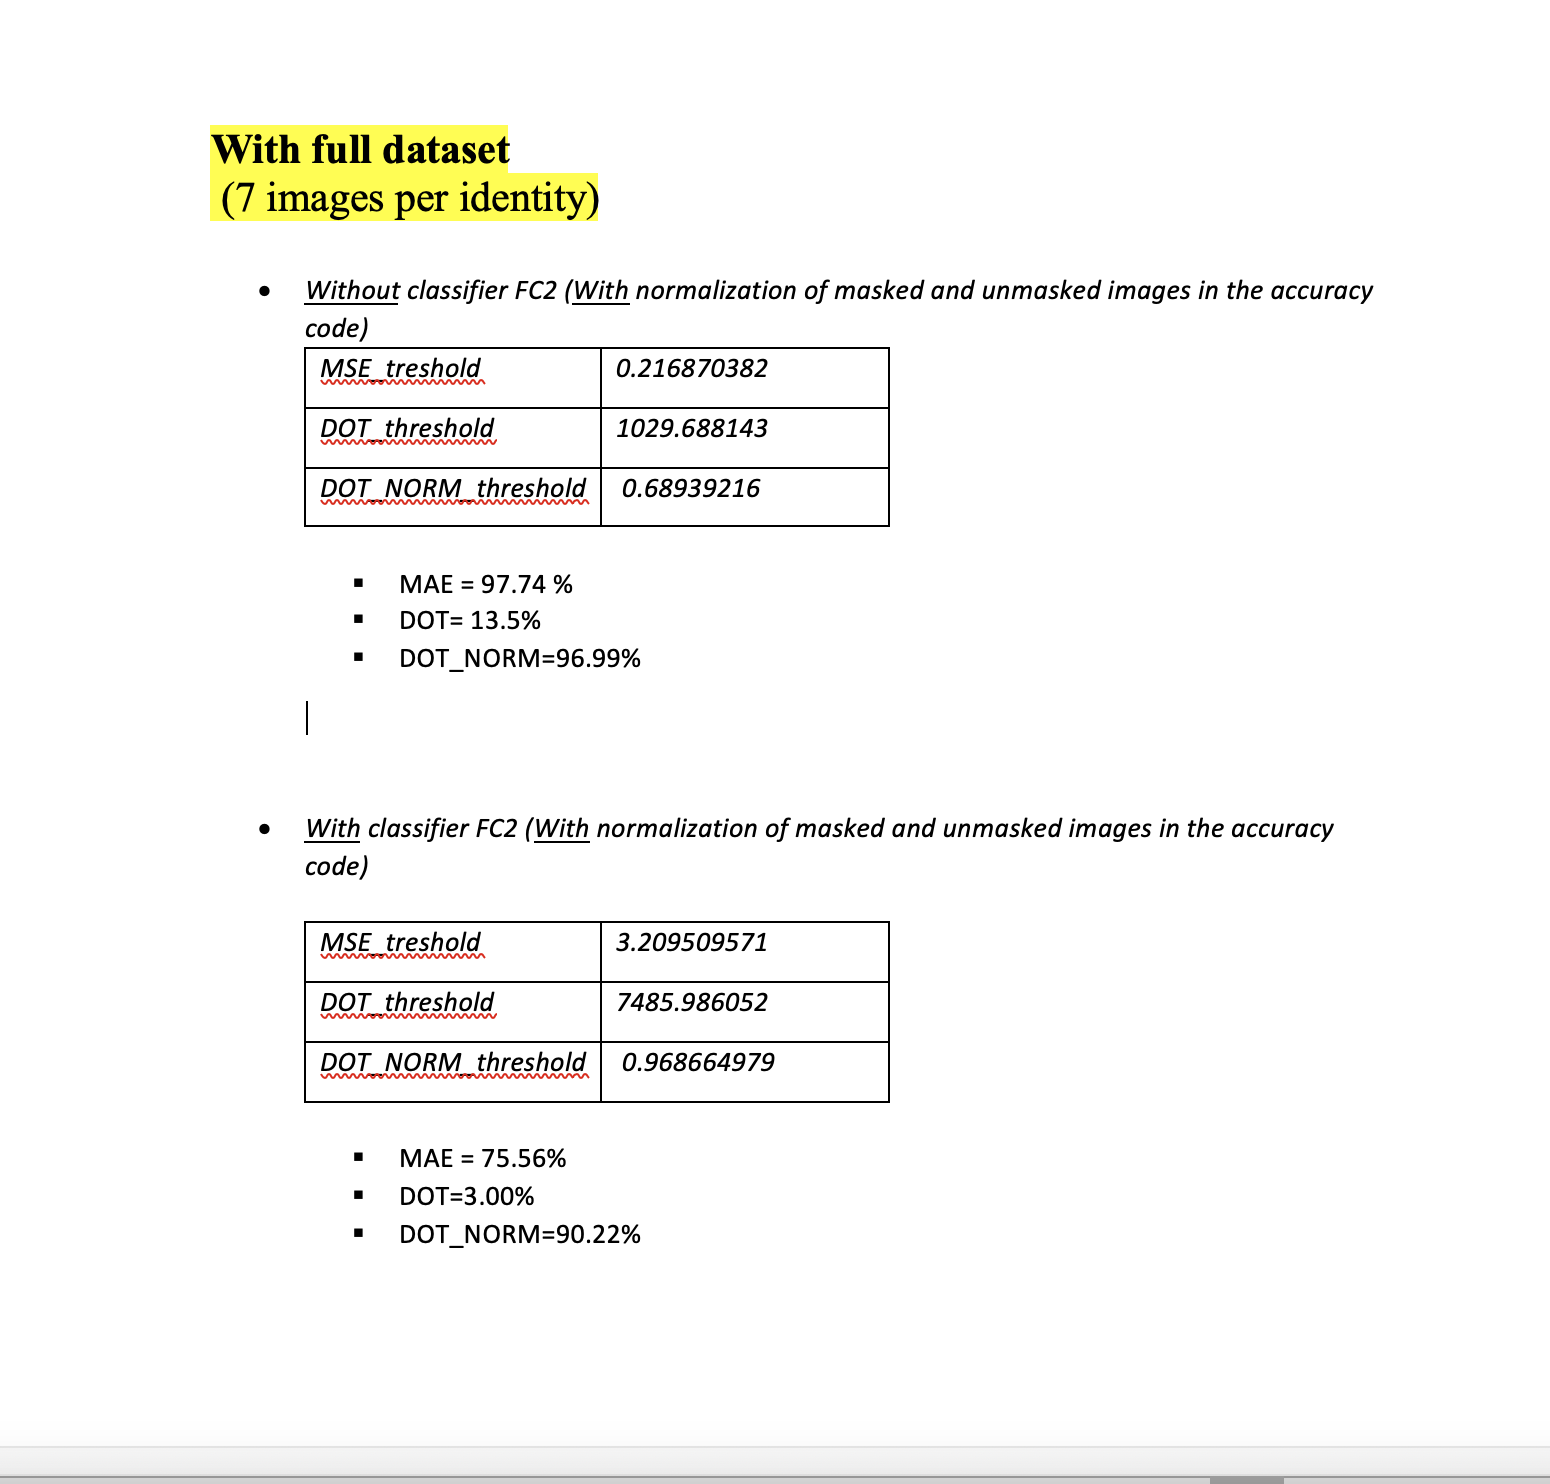




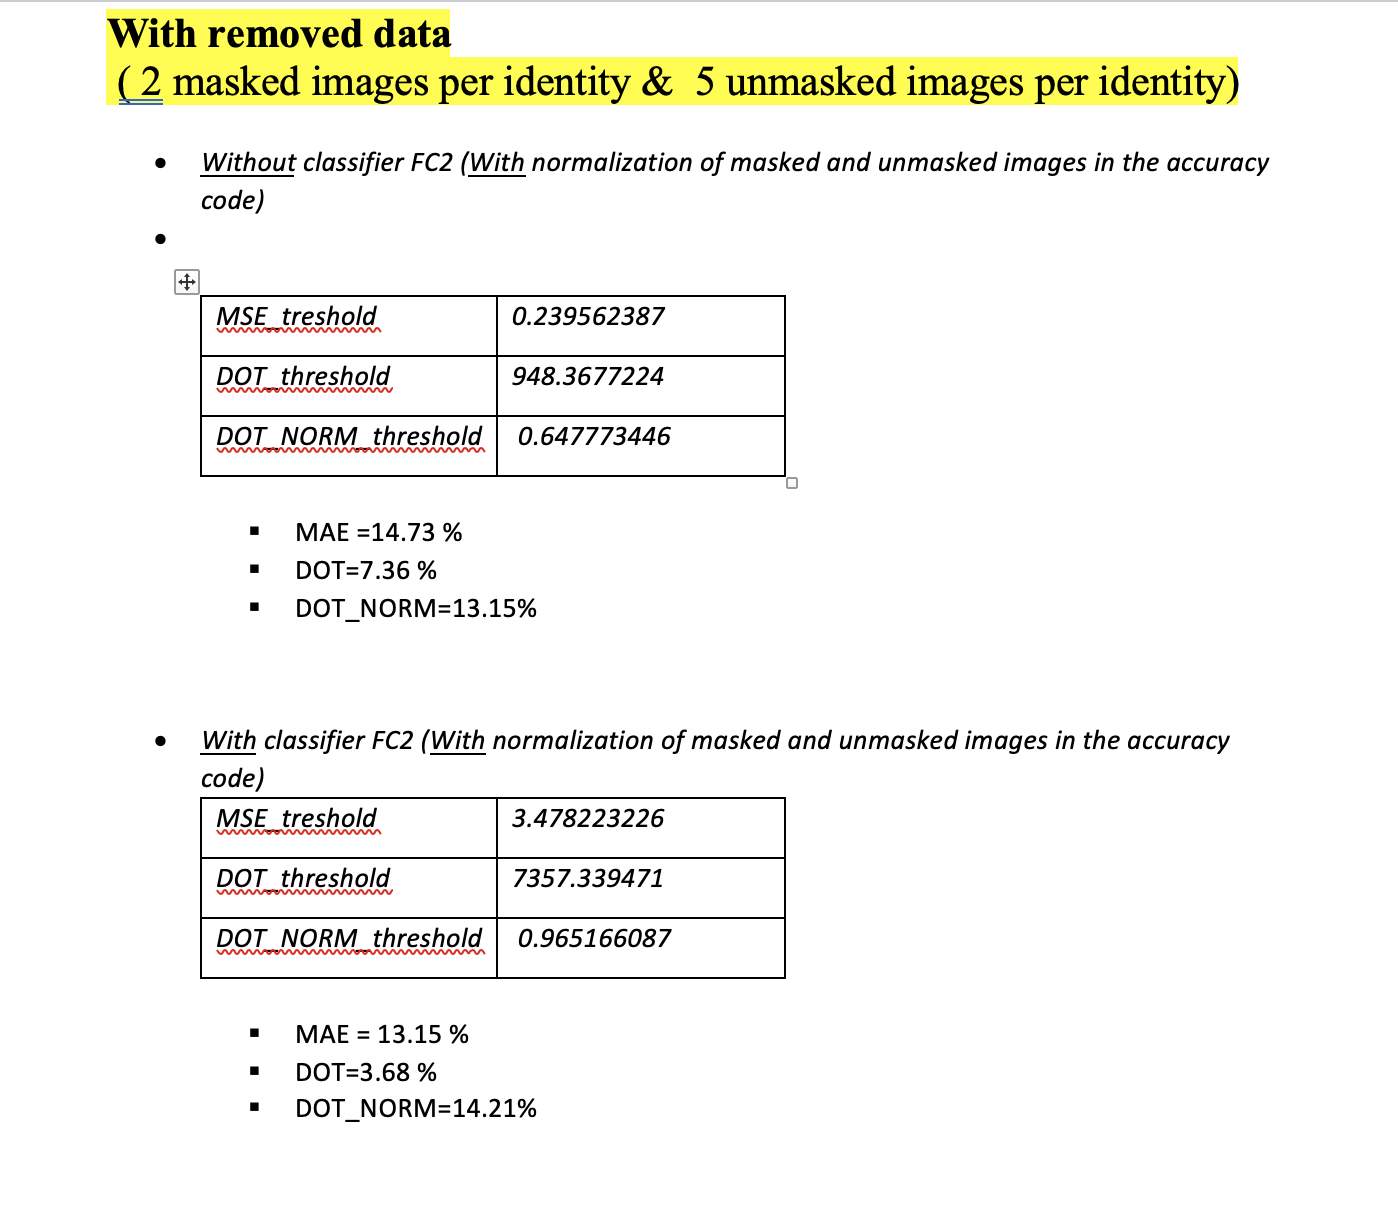
